In [1]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline

/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
p='/Users/eyi/Dropbox/Projects/Datasets/2015/Eviction_Notices.csv'
p=os.getcwd()+'/Eviction_Notices.csv'
d_evict=pd.read_csv(p)
print d_evict.shape
d_evict.head(1)

(34802, 30)


/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (4,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Eviction_ID,Address,City,State,Zip,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints,Constraints Date,Supervisor_District,Neighborhood,Client_Location
0,M153486,0 Block of Raymond Avenue,San Francisco,CA,94134,12/30/2015,False,False,False,False,...,False,False,False,False,NaN,False,NaN,10,Visitacion Valley,"(37.7121484523486, -122.404287840075)"


/Users/eyi/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


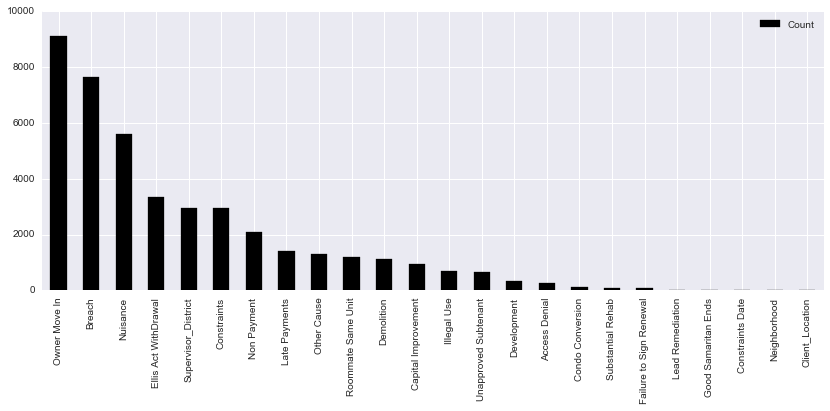

In [3]:
# Create dataframe to store counts
stor_v=pd.DataFrame(columns=['Count'])
# Iterate through each column (cateogry)
for c in d_evict.columns[6:]:
    # For each category, slice dataframe and count the number of rows
    stor_v.loc[c,'Count']=d_evict[d_evict[c]==True].shape[0]
# Sort and plot
stor_v.sort('Count',inplace=True,ascending=False)
stor_v.plot(kind='bar',figsize=(14,5),color='k')

In [4]:
# Look at only the top few categories
stor_v=stor_v[stor_v.index!='month']
stor_v.head(10)

,Count
Owner Move In,9115
Breach,7648
Nuisance,5619
Ellis Act WithDrawal,3358
Supervisor_District,2950
Constraints,2942
Non Payment,2086
Late Payments,1403
Other Cause,1286
Roommate Same Unit,1210


In [5]:
# Get date
d_evict.index=pd.DatetimeIndex(d_evict['File Date'])
d_evict['date']=d_evict.index.date
d_evict['year']=d_evict.index.year
d_evict['month']=d_evict.index.month
d_evict['Month_Year']=d_evict['date'].apply(lambda x: x.strftime('%Y-%m'))
d_evict.head(3)

# Count 
stor=[]
stor_n=[]
labels=[]

# Categoies to include
cats_top=6

# Iterate through each column / cateogry
for c in stor_v.index[0:cats_top]:
    
    # For each category, slice dataframe and count the number of rows
    try:
        
        # Group on time
        s=d_evict[d_evict[c]==True].groupby('Month_Year').size()
        # Group on month, hood
        s_n=a=d_evict[d_evict[c]==True].groupby(['Month_Year','Neighborhood']).size()
                
        # Labels for cols when there is a pos
        labels=labels+[c]
        # Store the data for pos 
        stor=stor+[s]
        stor_n=stor_n+[s_n]
    
    # If there are no positives, throw error
    except:
        None
    
# Eviction type over time 
stor_ts=pd.concat(stor,axis=1).fillna(0)
stor_ts.columns=labels
# Eviction type over time by hood
stor_n_ts=pd.concat(stor_n,axis=1).fillna(0) 
stor_n_ts.columns=labels

In [6]:
stor_n_ts.head(3)

Owner Move In  Breach  Nuisance  \
Month_Year Neighborhood                                             
1997-01    Bayview Hunters Point              1       0         0   
           Bernal Heights                     3       1         0   
           Castro/Upper Market                6       0         0   

                                  Ellis Act WithDrawal  Supervisor_District  \
Month_Year Neighborhood                                                       
1997-01    Bayview Hunters Point                     0                    0   
           Bernal Heights                            0                    0   
           Castro/Upper Market                       0                    0   

                                  Constraints  
Month_Year Neighborhood                        
1997-01    Bayview Hunters Point            0  
           Bernal Heights                   0  
           Castro/Upper Market              0

In [7]:
# Sum across all types for each hood - time 
stor_n_ts_unstack=stor_n_ts.sum(axis=1).unstack().fillna(0)
stor_n_ts_unstack.head(3)

Neighborhood,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Glen Park,Golden Gate Park,Haight Ashbury,Hayes Valley,...,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Treasure Island,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
Month_Year,,,,,,,,,,,,,,,,,,,,,
1997-01,1,4,6,1,0,0,0,0,5,2,...,3,0,4,7,6,0,2,1,5,4
1997-02,0,5,6,1,0,0,1,0,2,4,...,5,0,2,9,2,0,0,0,2,2
1997-03,1,4,15,1,2,0,0,0,5,4,...,2,2,3,7,2,0,0,0,1,2


*** Time series***

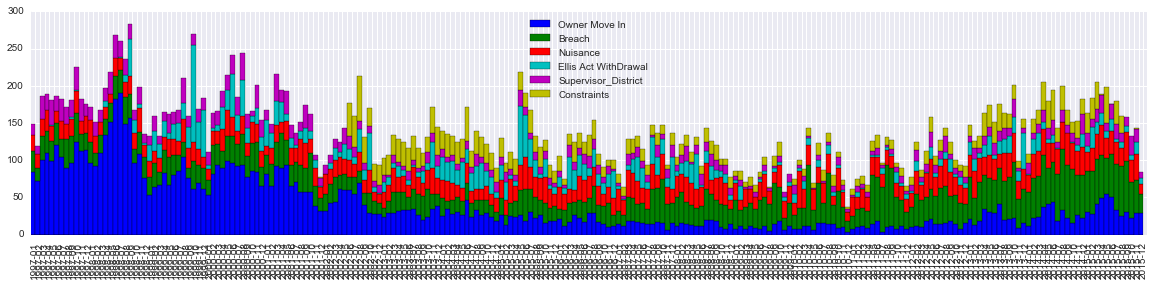

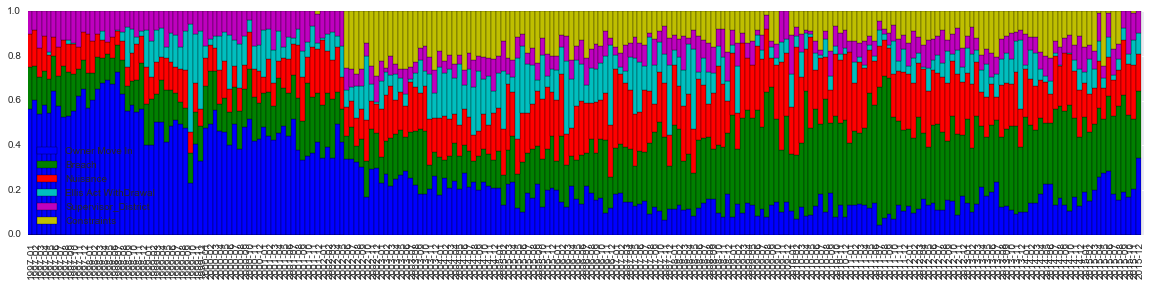

In [ ]:
# TS by top evication types
stor_ts.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
plt.show()

stor_ts_n=stor_ts.div(stor_ts.sum(axis=1),axis=0)
stor_ts_n.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
plt.ylim([0,1])
plt.show()

*** Timeseries per hood ***

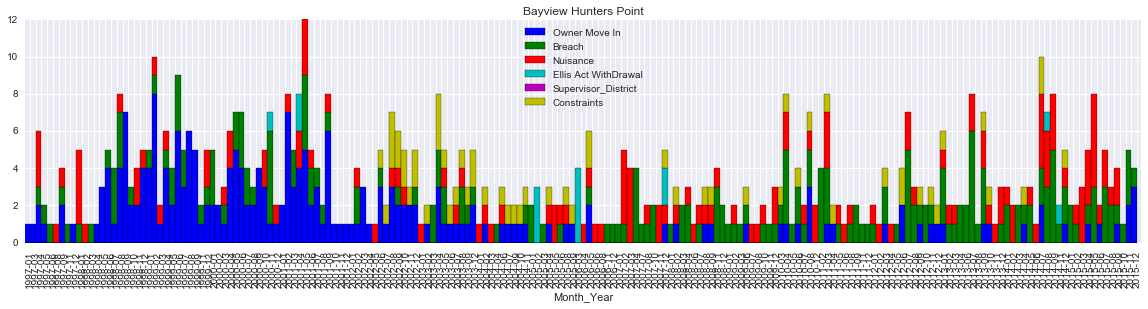

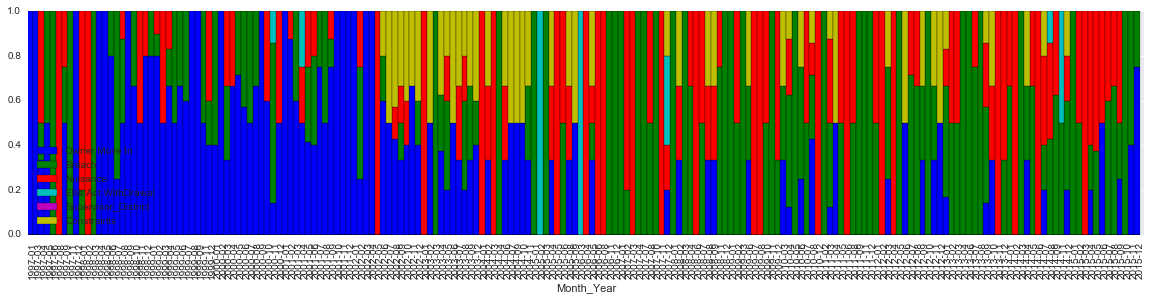

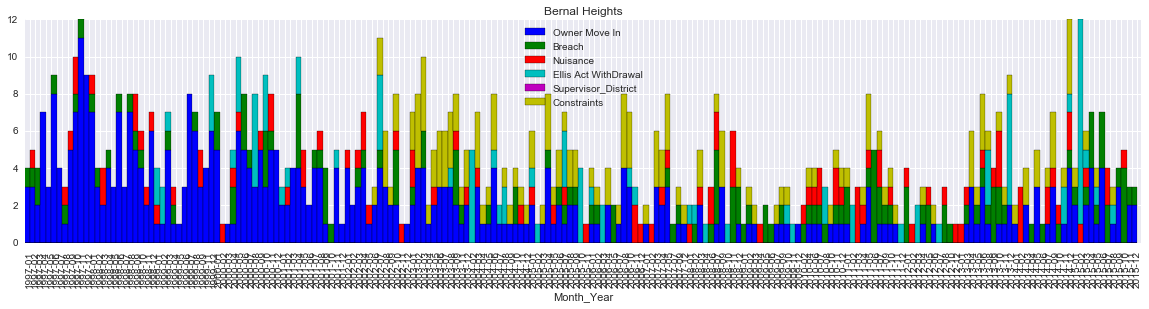

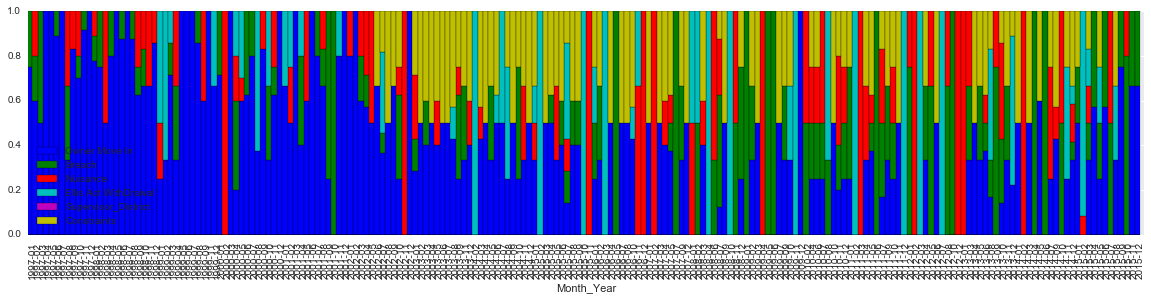

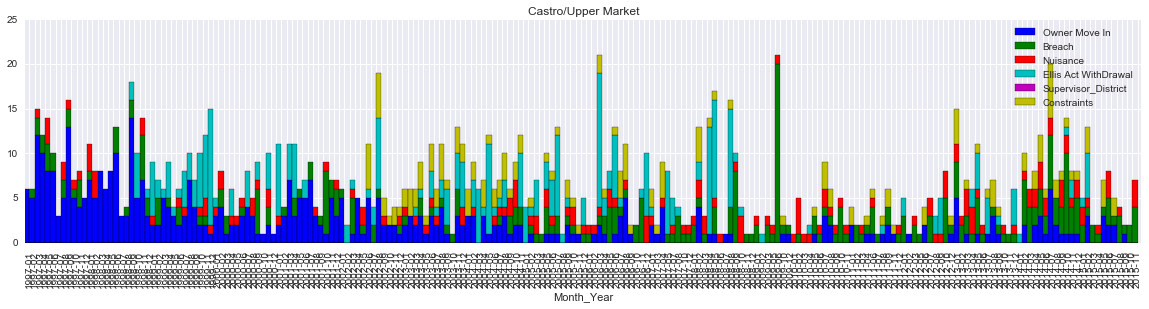

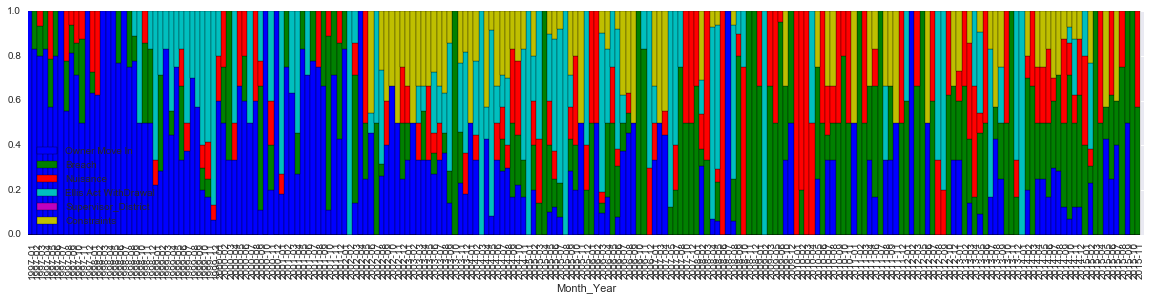

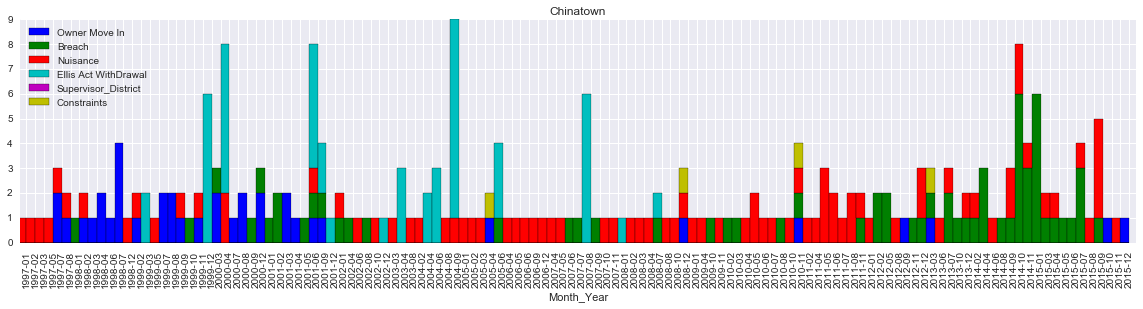

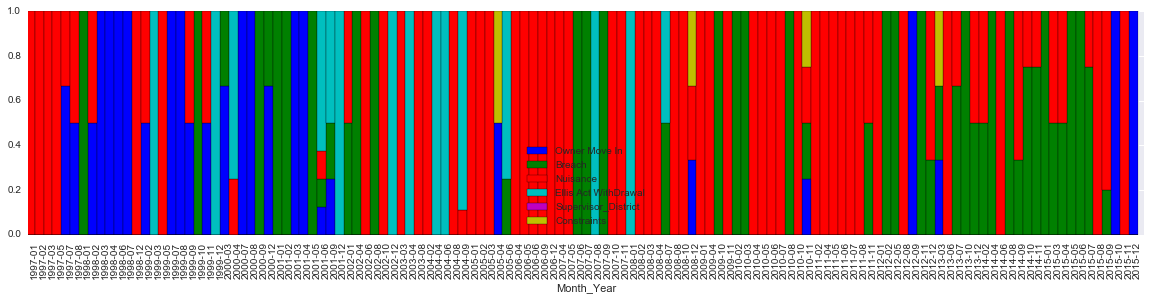

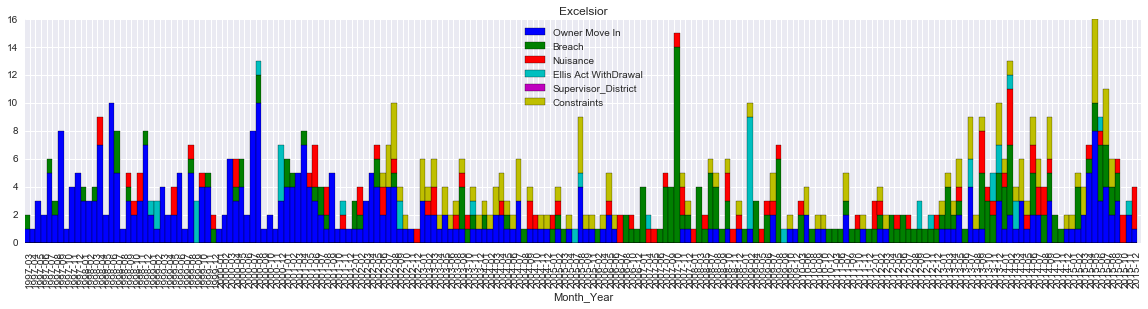

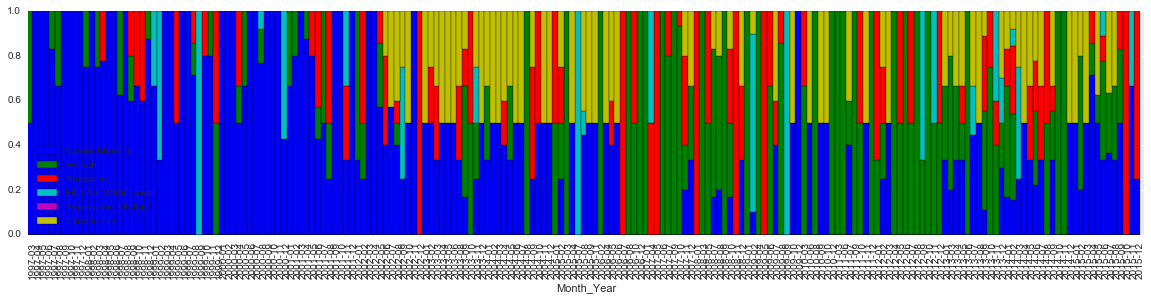

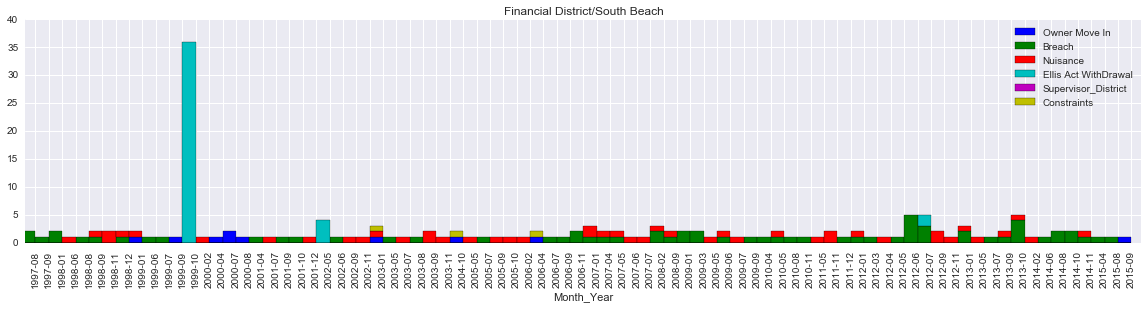

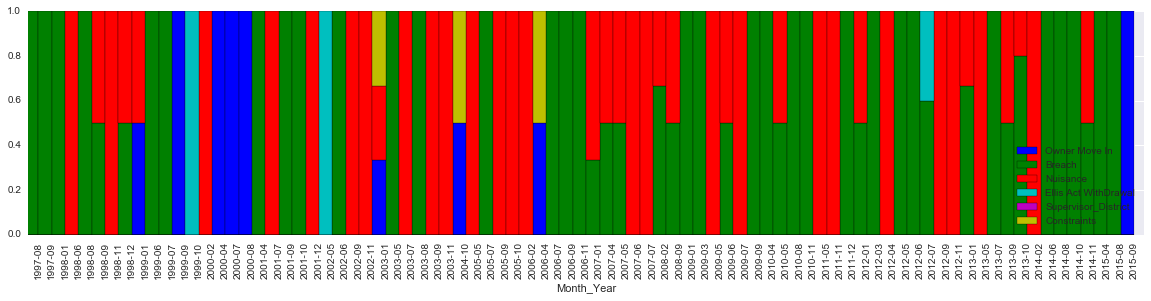

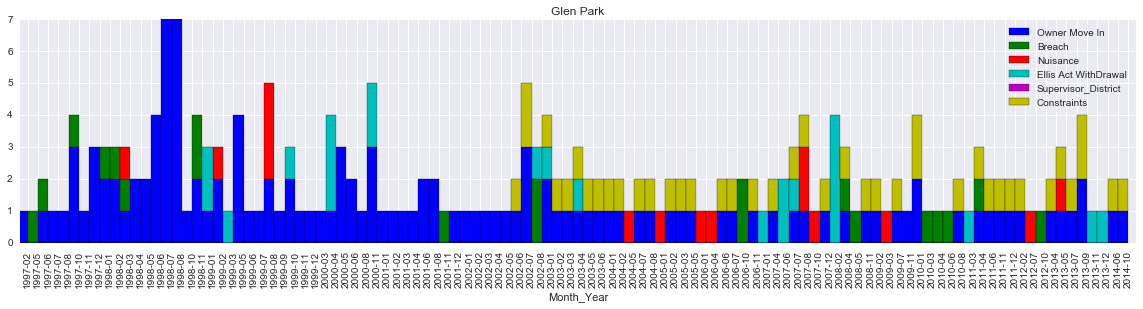

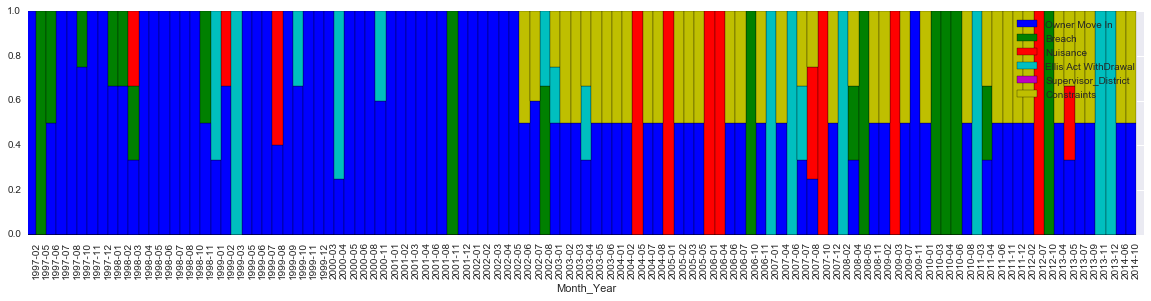

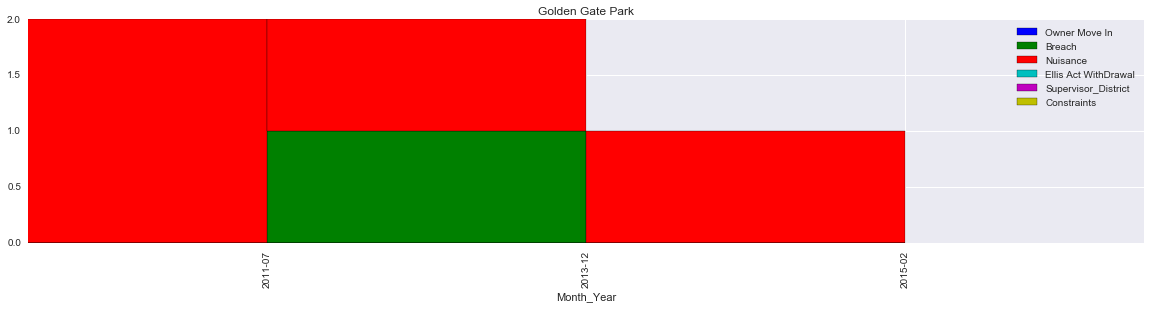

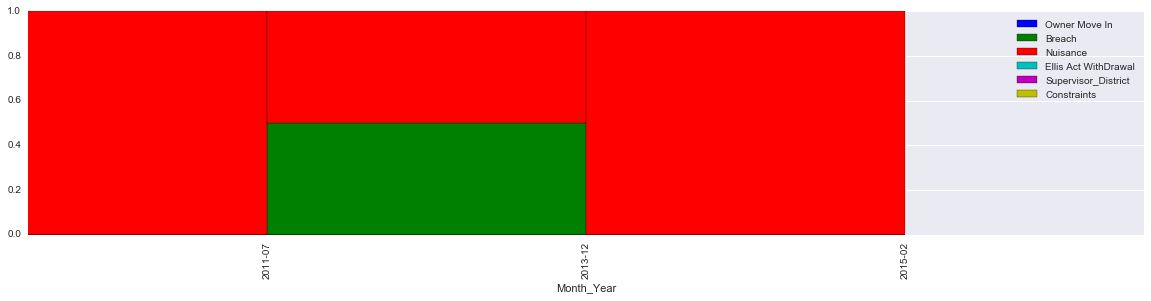

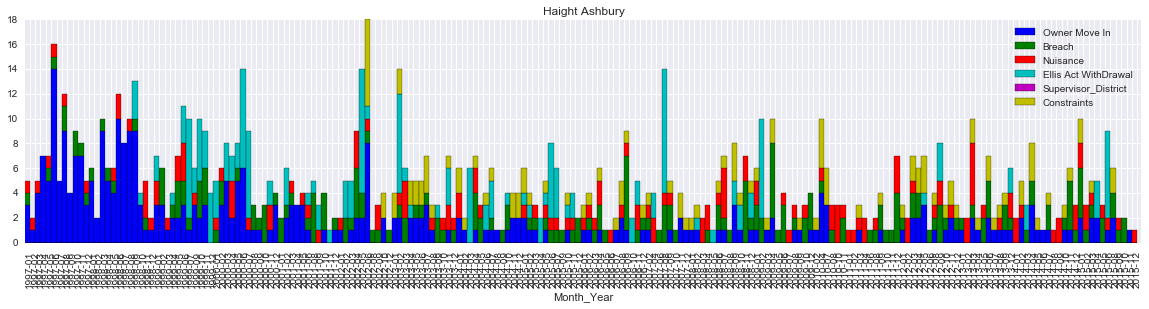

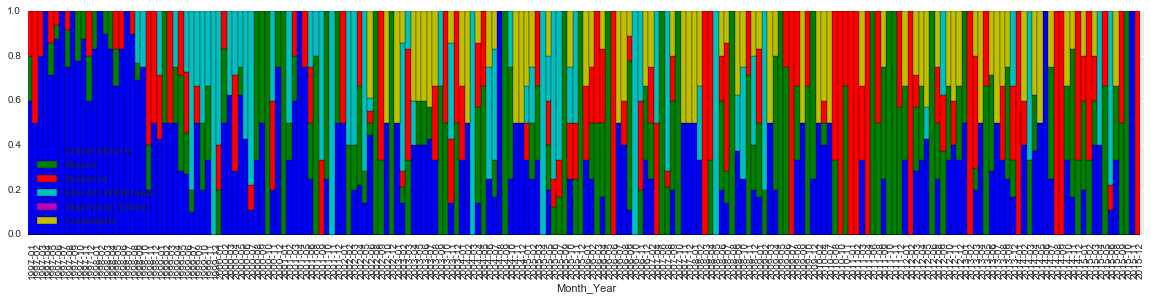

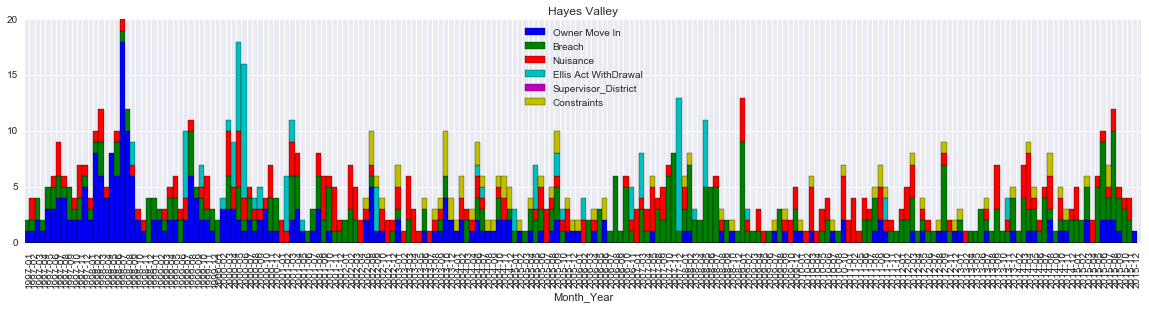

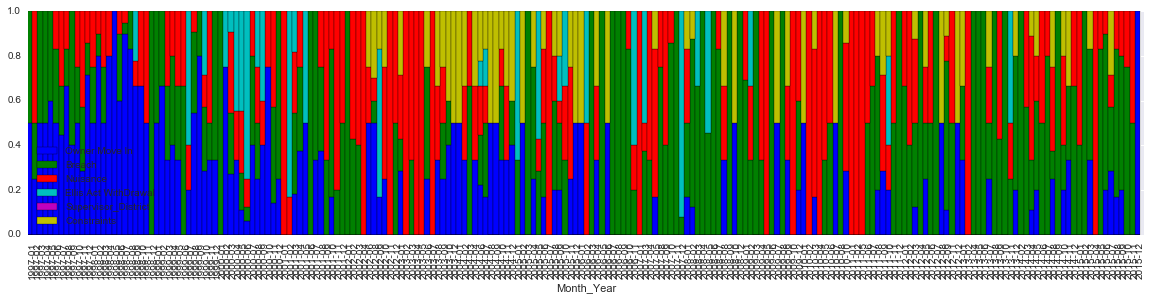

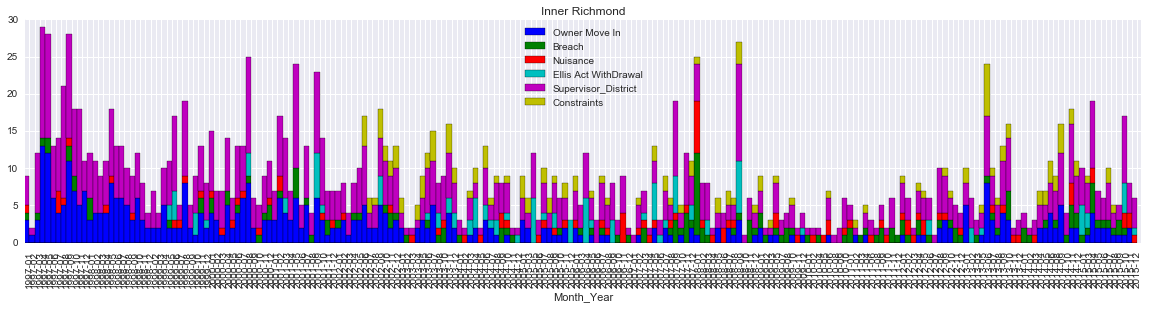

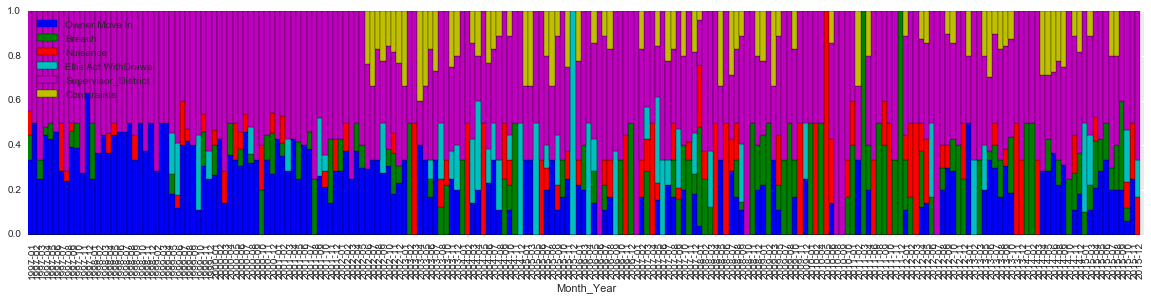

In [ ]:
stor_n_ts_swithc=stor_n_ts.swaplevel('Neighborhood','Month_Year')

for hood in stor_n_ts_unstack.columns:

    ts=stor_n_ts_swithc.loc[hood]

    ts.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
    plt.title('%s'%hood)
    plt.show()

    ts_n=ts.div(ts.sum(axis=1),axis=0)
    ts_n.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
    plt.ylim([0,1])
    plt.show()

*** Aggregate acrsoss hoods ***

In [ ]:
hoods_top=6
hood_s=stor_n_ts_unstack.sum(axis=0)
hood_s.sort_values(ascending=False,inplace=True)
hood_s.head(10)

In [ ]:
# Top
stor_n_ts_unstack_top=stor_n_ts_unstack[hood_s.index[0:hoods_top]]
stor_n_ts_unstack_top.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
plt.show()

stor_n_ts_n=stor_n_ts_unstack_top.div(stor_n_ts_unstack_top.sum(axis=1),axis=0)
stor_n_ts_n.plot(kind='bar',figsize=(20,4),stacked=True,width=1)
plt.ylim([0,1])
plt.show()

In [ ]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [ ]:
d_evict_clean=pd.DataFrame(d_evict[d_evict.Client_Location!='1 QNAN\n'])
d_evict_clean.Client_Location=pd.DataFrame(d_evict_clean.Client_Location.astype(str))

def split_lat(x):
    try:
        r=x.split('(')[1].split(',')[0]
    except:
        r=0
    return r

def split_lng(x):
    try:
        r=x.split(' ')[1].split(')')[0]
    except:
        r=0
    return r

d_evict_clean['lat']=d_evict_clean.Client_Location.apply(split_lat)
d_evict_clean['lng']=d_evict_clean.Client_Location.apply(split_lng)

In [ ]:
center = [d_evict_clean.lat.median(),d_evict_clean.lng.median()]
df_map = folium.Map(location=center,tiles='Mapbox',zoom_start=12,API_key='cray.16710dba',width=1060,height=1000)
d_evict_clean_pairs=d_evict_clean[['lat','lng']]
for pair in d_evict_clean_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .1, fill_opacity=1, line_color = 'red', fill_color = 'red')

In [ ]:
df_map.create_map()
embed_map(df_map)